### Load libraries 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from datetime import datetime,timedelta
import squarify 

### Load Dataset

In [4]:

print("Choose a month database [eg:2019-Oct.csv}] from the list: ")
dat_list = ['2019-Oct.csv', '2019-Nov.csv', '2019-Dec.csv', '2020-Jan.csv', '2020-Feb.csv', '2020-Mar.csv', '2020-Apr.csv' ]
print(dat_list)

def input_check(list):   
    x = input()
    if x not in list :
        print("Database not included")
        return False
    else :
        return x


Choose a month database [eg:2019-Oct.csv}] from the list: 
['2019-Oct.csv', '2019-Nov.csv', '2019-Dec.csv', '2020-Jan.csv', '2020-Feb.csv', '2020-Mar.csv', '2020-Apr.csv']


In [ ]:
month = input_check(dat_list)
dataset = pd.read_csv(month , header = 'infer', parse_dates = ['event_time'],date_parser= pd.to_datetime )

In [ ]:
print("Load another database " )
print("Choose a month database")
month = input_check(dat_list)
dataset = dataset.append(pd.read_csv(month, header='infer', parse_dates=['event_time'], date_parser=pd.to_datetime))

In [2]:
#dataset limitato ad ottobre e novembre 
dataset= pd.read_csv('2019-Oct.csv', header = 'infer',parse_dates = ['event_time'],date_parser= pd.to_datetime ) 
dataset = dataset.append(pd.read_csv('2019-Nov.csv', header='infer', parse_dates=['event_time'], date_parser=pd.to_datetime))

In [2]:
#importazione del database vendite
Sales = pd.read_csv('full_sales.csv', header = 'infer',
                     parse_dates = ['event_time'],
                     date_parser= pd.to_datetime )

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109950743 entries, 0 to 67501978
Data columns (total 9 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     object             
 2   product_id     int64              
 3   category_id    int64              
 4   category_code  object             
 5   brand          object             
 6   price          float64            
 7   user_id        int64              
 8   user_session   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 8.2+ GB


In [28]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6848824 entries, 0 to 6848823
Data columns (total 9 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     object             
 2   product_id     int64              
 3   category_id    int64              
 4   category_code  object             
 5   brand          object             
 6   price          float64            
 7   user_id        int64              
 8   user_session   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 470.3+ MB


### Introduction 

The dataset set was built considering the two months October and November 2019.   
They were joined using the append function.   
The dataset consists of nine columns and a brief description of which is given below:

<ol>
<li>Event Time: date and time when an operation was performed.  </li>
<li>Event Type: type of operation that is performed (view, cart, purchase). </li>
<li>Product id: identification code of a product. </li>
<li>Category id: identification code of a category.</li>
<li>Category code: type of category and subcategory to which an article relates   (e.g. "electronics.smartphone").</li>
<li>Brand: product brand.  </li>
<li>Price: product price.  </li>
<li>User id: user identification code.  </li>
<li>User session: session identification code. Has a limited time and there can be multiple sessions for each user.  </li>
</ol> 

#### REQUEST 1

A marketing funnel describes your customer’s journey with your e-commerce. It may involve different stages, beginning when someone learns about your business, when he/she visits your website for the first time, to the purchasing stage, marketing funnels map routes to conversion and beyond. Suppose your funnel involves just three simple steps: 1) view, 2) cart, 3) purchase. Which is the rate of complete funnels

***1.1 What’s the operation users repeat more on average within a session? 
Produce a plot that shows the average number of times users perform each operation (view/removefromchart etc etc).***


After a first analysis, we saw that the "removefromcart" event was not present in the database among the possible   events considered.  
So we limited our analysis on "view", "chart" and "purchase" events only. 
When the use of the "removefromcart" event type was requested, it was obtained from the difference between the total number of the "cart" events minus the total number of the "purchase" events. 

In [8]:
dataset['event_type'].value_counts()

view        104335509
cart          3955446
purchase      1659788
Name: event_type, dtype: int64

### Operations per session performed

event_type
cart        0.171852
purchase    0.072112
view        4.533045
Name: event_type, dtype: float64


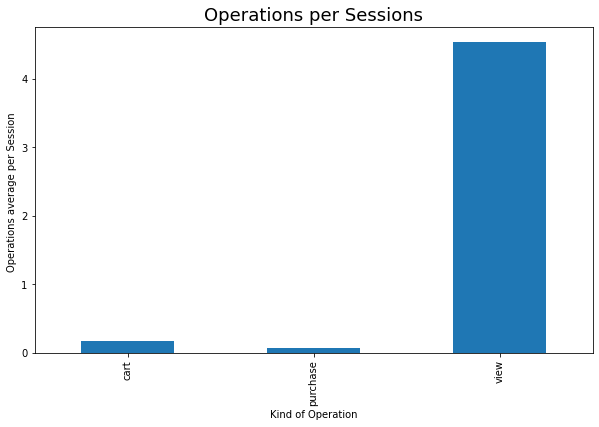

In [7]:
#Bar Histogram of the average number of operations performed by each user for each session. LA SOMMA DEVE FARE 100
n_events = dataset.groupby('event_type').event_type.count()
n_session = dataset.user_session.nunique()
print
op_session_mean = n_events/n_session
op_session_mean.plot.bar(figsize=(10,6))
print (op_session_mean)
plt.title("Operations per Sessions", fontsize=18)
plt.xlabel("Kind of Operation")
plt.ylabel("Operations average per Session ")
plt.show()

### Graphics division of user operations per session using Squarify 

<function matplotlib.pyplot.show(*args, **kw)>

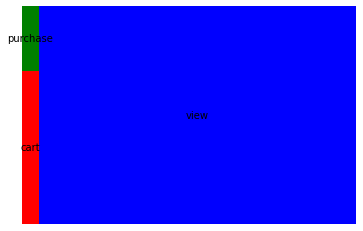

In [8]:
n_events = dataset.groupby('event_type').event_type.count()
squarify.plot(sizes= n_events, label= n_events.index.array, color = ['red', 'green', 'blue'])
plt.axis('off')
plt.show

### Percentages of operations performed on the dataset

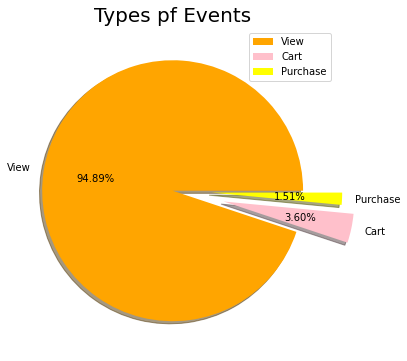

In [9]:
my_labels= ['View','Cart', 'Purchase']
my_color = ['Orange', 'pink', 'yellow']
my_explode= [0, 0.4, 0.3]
plt.figure(figsize=(6,6))
plt.pie(dataset['event_type'].value_counts(), labels = my_labels,colors= my_color, explode = my_explode, shadow= True,  autopct= '%.2f%%')
plt.legend()
plt.title('Types pf Events', fontsize=  20 )
plt.show()

***1.2 How many times, on average, a user views a product before adding it to the cart?***

In [23]:
avg = dataset[dataset.event_type == 'view'].product_id.count()/dataset[dataset.event_type == 'cart'].product_id.count()
float("{:.2f}".format(avg))

26.38

**1.3 What’s the probability that products added once to the cart are effectively bought?**


In [22]:
#probability could be greater than one if you do not consider a consistent number of raws 
prob = dataset[dataset.event_type == 'purchase'].product_id.count()/\
dataset[dataset.event_type == 'cart'].product_id.count()

float("{:.2f}".format(prob))

0.42

***1.4 What’s the average time an item stays in the cart before being removed?***

As said, the "removefromchart" event is not present in the database so we have no time references available for that event.   
For this reason, we have only the "removefromcart" number. 

In [10]:
#numers of times that a product is added to the cart, grouped by prod_id
n_cart = dataset[(dataset.event_type == 'cart')].product_id
#numers of times that a product is purchased, grouped by prod_id
n_purchase = dataset[(dataset.event_type == 'purchase')].product_id
print(len(n_cart)-len(n_purchase))


2295658


***1.5 How much time passes on average between the first view time and a purchase/addition to cart?***

In [9]:
Start = dataset[dataset.event_type == 'view'].groupby(["product_id", "user_id"]).event_time.min()
End = dataset[(dataset.event_type == 'purchase') | (dataset.event_type == 'cart')].groupby(["product_id", "user_id"]).event_time.max()


In [12]:
Time = int(((End-Start).dt.total_seconds().sum()/(End-Start).count()))
print("The average time between first view and addition to cart/purchase is:")
"{}".format(str(timedelta(seconds=Time)))


The average time between first view and addition to cart/purchase is:


'2 days, 22:43:57'

#### REQUEST 2

***2.1 What are the categories of the most trending products overall? For each month visualize this information through a plot showing the number of sold products per category.***

In [3]:
def from_category_code_to_category(l):
    str(l)
    return l.split(".")[0]

We take the Sales list of purchases.
Then we remove all "category code" for all those products that had empty field. 
We add a column that specifies its subcategory for each element and  group the "purchase" event according to month and category code. 
Let's turn the result into a dictionary that will have as its key the three values ( month, category).
The value will be the number of products in that category that have been purchased.

In [4]:
purchases = Sales[Sales["category_code"].notnull()]
purchases["category"] = purchases["category_code"].map(from_category_code_to_category)
result = purchases.groupby([purchases.event_time.dt.strftime("%B"), purchases.category]).product_id.count()


<ipython-input-4-e770e925f837>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases["category"] = purchases["category_code"].map(from_category_code_to_category)


In [5]:
#List of all unique macrocategories
categories_u = purchases.category.unique()
categories_u

array(['electronics', 'furniture', 'appliances', 'auto', 'computers',
       'construction', 'apparel', 'accessories', 'stationery', 'kids',
       'medicine', 'sport', 'country_yard'], dtype=object)

In [6]:
#Let's turn the result into a dictionary that will have as its key the three values ( month, category)
#The value will be the number of products in that category that have been purchased
dict_res = dict(result)


We build a dictionary that has the month as its key and the value of a pair of lists.   
The first one contains the category codes of a month (x-axis).  
The second contains the products purchased for each category (y-axis).

In [7]:
final_dict = {}
for key in dict_res:
    # Se final dict non ha ancora il mese nel dizionario lo devo inizializzare
    if key[0] not in final_dict:
        print(key[0])
        final_dict[key[0]] = [[],[]]
    final_dict[key[0]][0].append(key[1])
    final_dict[key[0]][1].append(dict_res[key])

April
December
February
January
March
November
October


For each month we plot the number of products sold for different categories. 

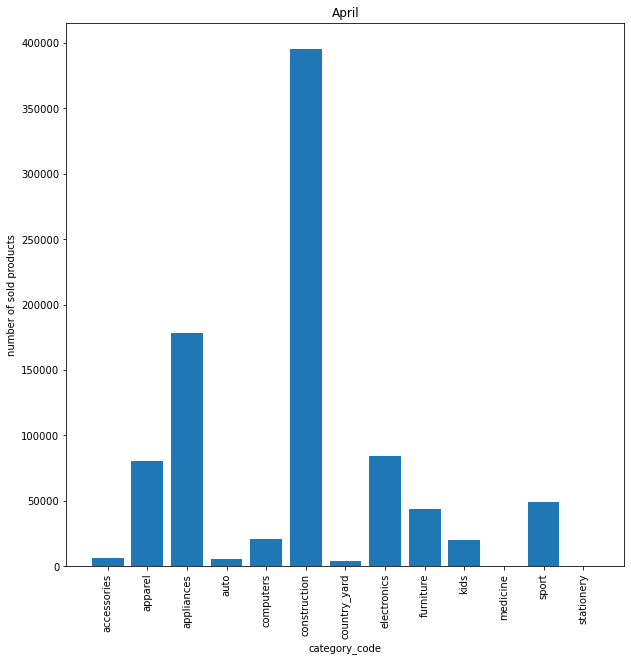

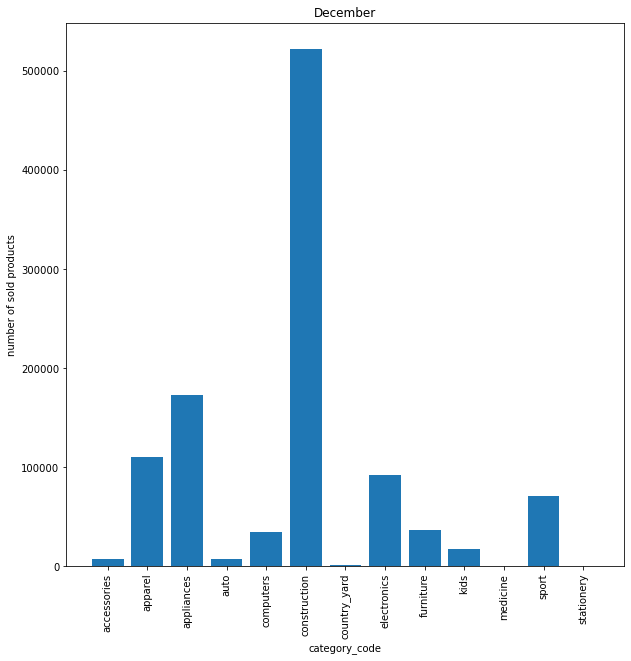

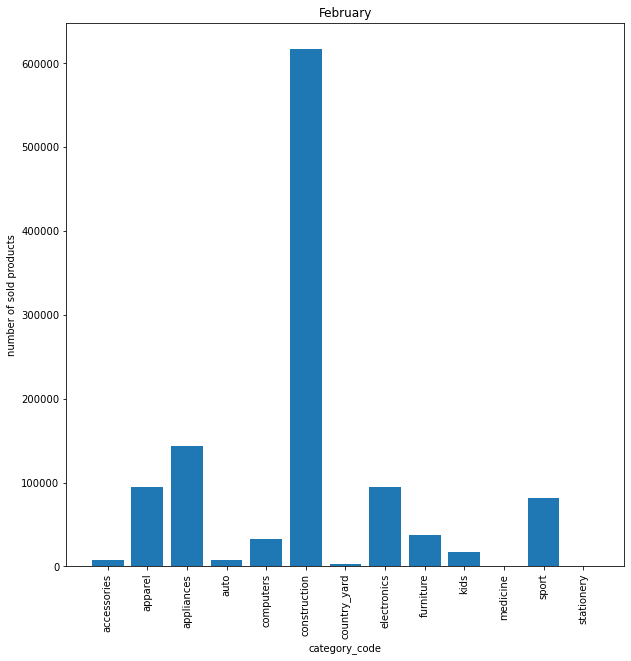

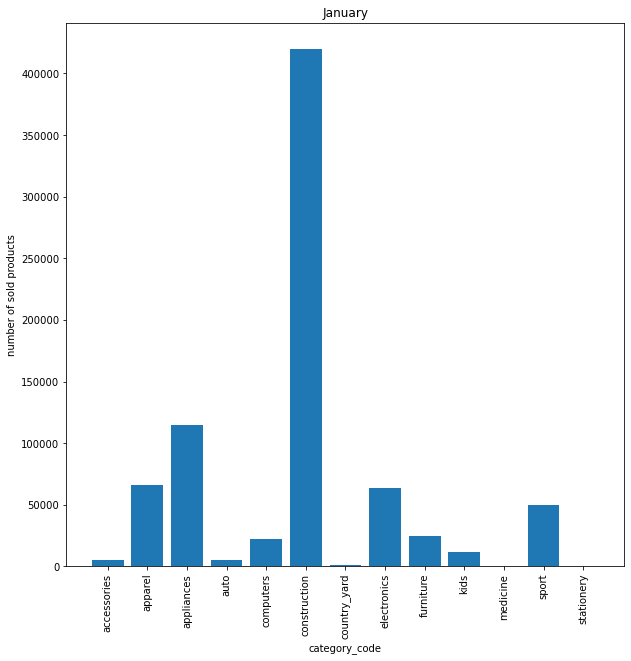

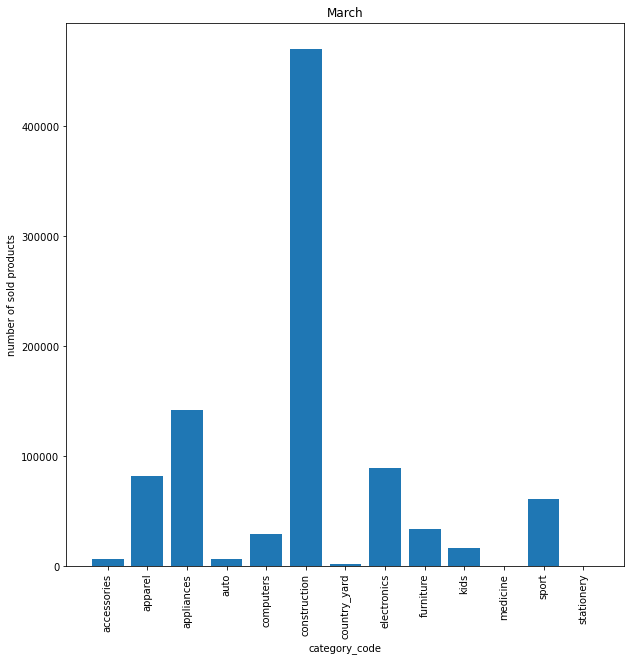

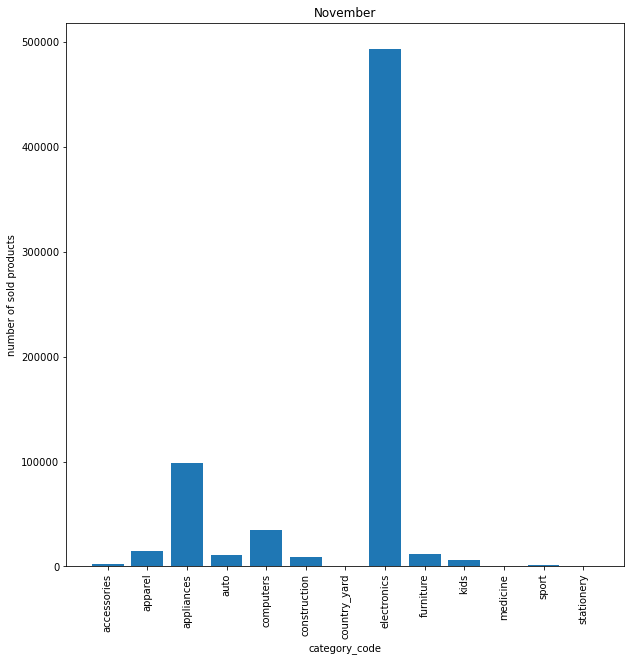

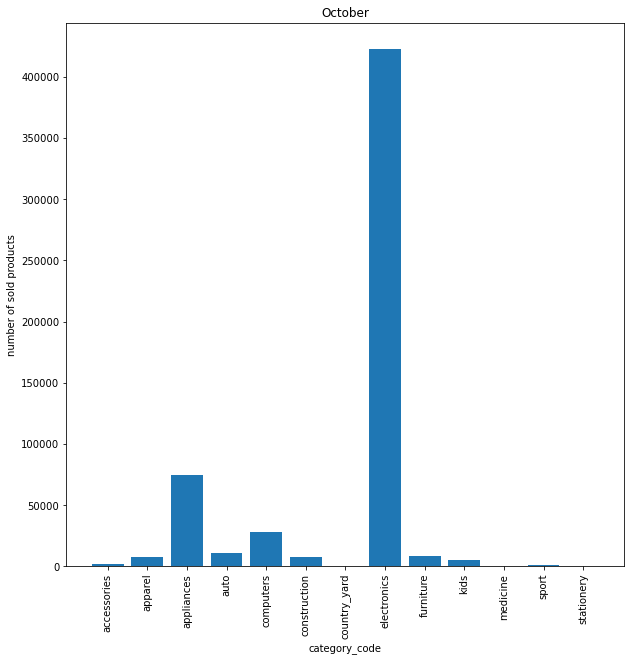

In [8]:
for month in final_dict:
    axis = final_dict[month]
    plt.figure(1, figsize=(10, 10))
    plt.bar(axis[0], axis[1])
    plt.ylabel("number of sold products")
    plt.xlabel("category_code")
    plt.xticks(rotation='vertical')
    plt.title(month)
    plt.show()

***2.2 Plot the most visited subcategories.***

In [17]:
views = dataset[dataset.event_type == "view"]

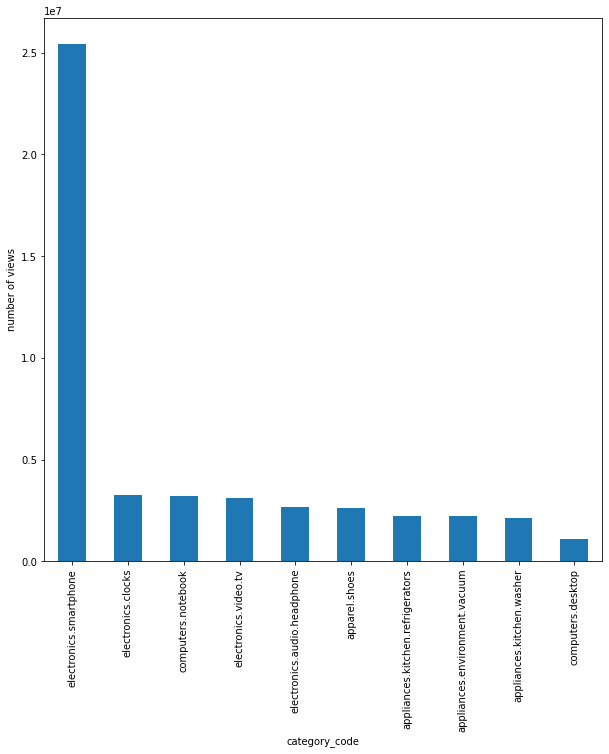

In [18]:
plt.figure(1, figsize = (10, 10))
views.groupby(views.category_code).event_type.count().nlargest(10).plot.bar()
plt.ylabel("number of views")
plt.show()

***2.3 What are the 10 most sold products per category?***

In [9]:
# Remove category queues that are empty.
purchases = Sales[Sales["category_code"].notnull()]

purchases["category"] = purchases["category_code"].map(from_category_code_to_category)

# Group purchases by category and by product_id and for each count the number of the products
result = purchases.groupby([purchases.category, purchases.product_id]).product_id.count()

#ten most purchased grouped by category 
result = result.groupby(["category"]).nlargest(10)

#the results have been entered in a dictionary 
dict_res = dict(result)

<ipython-input-9-7d958806f211>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases["category"] = purchases["category_code"].map(from_category_code_to_category)


In [10]:
#products are sorted by category for each category in descending order 
cat = []
i = 0
for key in dict_res:
    if key[1] not in cat:
        print("category: "+key[1])
        cat.append(key[1])
        i = 1
    print("\t" + str(i) + ". product_id: "+str(key[2])+" | number: "+str(dict_res[key]))
    i += 1

category: accessories
	1. product_id: 4700478 | number: 1669
	2. product_id: 4700630 | number: 1127
	3. product_id: 4700419 | number: 508
	4. product_id: 16000973 | number: 484
	5. product_id: 16000974 | number: 465
	6. product_id: 4700738 | number: 376
	7. product_id: 4700589 | number: 361
	8. product_id: 4700407 | number: 340
	9. product_id: 100017531 | number: 287
	10. product_id: 16200000 | number: 255
category: apparel
	1. product_id: 5100816 | number: 34980
	2. product_id: 4100346 | number: 10641
	3. product_id: 4100126 | number: 5095
	4. product_id: 1200947 | number: 5042
	5. product_id: 16500007 | number: 4442
	6. product_id: 5100503 | number: 3971
	7. product_id: 100058915 | number: 3439
	8. product_id: 1201504 | number: 3390
	9. product_id: 1201465 | number: 3054
	10. product_id: 100190575 | number: 2821
category: appliances
	1. product_id: 1801690 | number: 14985
	2. product_id: 3700926 | number: 13892
	3. product_id: 1005174 | number: 11965
	4. product_id: 1801766 | number:

#### REQUEST 3

For each category, what’s the brand whose prices are higher on average? 

***3.1 Write a function that asks the user a category in input and returns a plot indicating the average price of the products sold by the brand.***

In [11]:
# Remove category queues that are empty.
purchases = Sales[Sales["category_code"].notnull()]
#We create one column for each element in each category. 
purchases["category"] = purchases["category_code"].map(from_category_code_to_category)


<ipython-input-11-73d27031f044>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases["category"] = purchases["category_code"].map(from_category_code_to_category)


In [12]:
categories_u = purchases.category.unique()

#check if the Category in in input is in the list 
def input_check(list):   
    x = input()
    if x not in list :
        print("Category not included")
        return False
    else :
        return x

category_input = input_check(categories_u)

electronics


In [13]:
#takes only the lines corresponding to the given category as input grouped by brand and for each one calculate the average 
meanprice = purchases[purchases.category == category_input].groupby(purchases.brand).price.mean().head(100)
meanprice

brand
a-case            4.378710
abaybooks         5.120000
acer            534.050525
aces             86.490000
acme             94.698136
                   ...    
beyerdynamic    124.856346
biolage          14.800000
biovise          10.810000
blackberry      387.988276
blackbox        117.045275
Name: price, Length: 100, dtype: float64

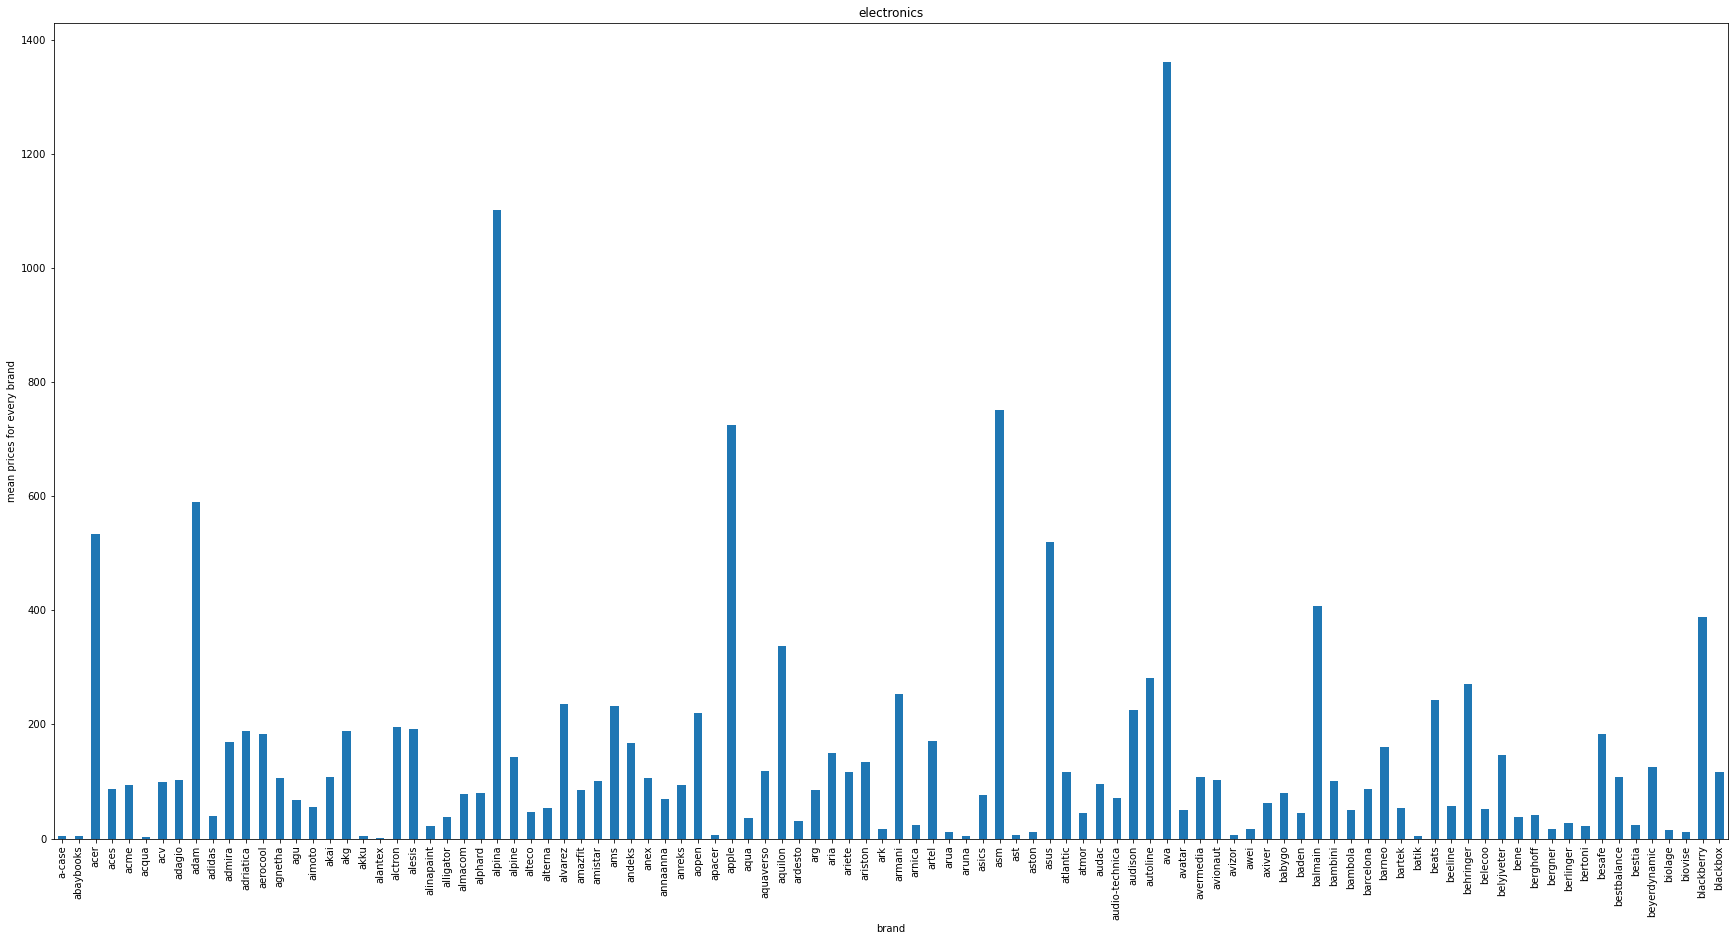

In [14]:
#Since we cannot put all the brands in the chart, we print the first 100 in alphabetical order. 
meanprice.plot.bar(figsize=(30, 15))
plt.ylabel("mean prices for every brand")
plt.title(category_input)
plt.show()

***3.2 Find, for each category, the brand with the highest average price. Return all the results in ascending order by price.***

In [15]:
# Remove category queues that are empty.
purchases = Sales[Sales["category_code"].notnull()]
#We create one column for each element in each category. 
purchases["category"] = purchases["category_code"].map(from_category_code_to_category)
result = purchases.groupby([purchases.category, purchases.brand]).price.mean()

result

<ipython-input-15-dd0b85bb5309>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases["category"] = purchases["category_code"].map(from_category_code_to_category)


category     brand  
accessories  a-elita     17.318571
             acer        51.318133
             acron       15.416667
             adidas      31.320213
             adili       19.407143
                           ...    
stationery   tomex       19.740000
             ultra       28.310000
             xiaomi      20.570000
             yamaha     361.890000
             zewa         4.040000
Name: price, Length: 8373, dtype: float64

In [16]:
#turns results into a table
result = result.reset_index()
idx = result.groupby(result.category).price.transform(max) == result.price

In [17]:
#Print the price table in descending order 
result[idx].sort_values( by =['price'], ascending=False)

,category,brand,price
2963,appliances,pinarello,2573.810000
3759,computers,cime,2536.596000
6327,furniture,gravas,2496.850000
1061,apparel,gomeldrev,2445.370000
7941,sport,kessler,2372.000000
5361,electronics,dreammachines,2362.706667
5029,construction,yjfitness,2344.980000
3401,auto,femi,2290.920000
7154,kids,hartan,1801.820000
8331,stationery,dewalt,931.940000


#### REQUEST 4

***4.1 How much does each brand earn per month? Write a function that given the name of a brand in input returns, for each month, its profit. Is the average price of products of different brands significantly different?***

In [19]:
#Create a list of all different unique brands
Brands_u = Sales.brand.unique()

Months = ['October', 'November', 'December', 'January','February', 'March', 'April']

#check if the brand in input is in the list 
def input_check(list):   
    brand = input()
    if brand not in list :
        print("brand non presente")
        return False
    else :
        return brand

x = input_check(Brands_u)


#profit() function takes as input a brand name, a month and the dataset of purchases(Sales) and returns 
#what profit that breand has made in that month
def profit(brand_x , Sales, month):
    return  (Sales[(Sales.brand == x) & (Sales.event_time.dt.strftime("%B") == month) ]\
             .groupby([Sales.event_time.dt.strftime("%B"), 'brand'] ).price.sum())

for month in Months:
    print(profit(x, Sales, month))


apple
event_time  brand
October     apple    1.112093e+08
Name: price, dtype: float64
event_time  brand
November    apple    1.275125e+08
Name: price, dtype: float64
event_time  brand
December    apple    1.573967e+08
Name: price, dtype: float64
event_time  brand
January     apple    1.258441e+08
Name: price, dtype: float64
event_time  brand
February    apple    1.917556e+08
Name: price, dtype: float64
event_time  brand
March       apple    1.413153e+08
Name: price, dtype: float64
event_time  brand
April       apple    7.428807e+07
Name: price, dtype: float64


***4.2 Using the function you just created, find the top 3 brands that have suffered the biggest losses in earnings between one month and the next, specifing bothe the loss percentage and the 2 months (e.g., brand_1 lost 20% between march and april).***

In [20]:
#this function is similar but don't receive a brand in input
def profit2( Sales, month):
    return  (Sales[Sales.event_time.dt.strftime("%B") == month ].groupby('brand' ).price.sum())


In [21]:
#codice per calcolare il rapporto delle perdite per tutti i mesi 
Months = ['October', 'November', 'December', 'January','February', 'March', 'April']

i=0
for month in Months:
    print ("From ", Months[i], "to" , Months[i+1], "the 3 biggest profit loss are (in %):")
    print( (profit2(Sales, Months[i+1])/(profit2(Sales, month))*100-100).nsmallest(3))
    i+=1
    if i == len(Months)-1:
        break

From  October to November the 3 biggest profit loss are (in %):
brand
jonnesway   -96.624338
sunfull     -96.000000
evga        -95.899730
Name: price, dtype: float64
From  November to December the 3 biggest profit loss are (in %):
brand
blackberry   -99.700730
finish       -99.096016
covani       -98.257322
Name: price, dtype: float64
From  December to January the 3 biggest profit loss are (in %):
brand
matrol        -99.734659
triumphnord   -99.331292
kaemingkbv    -99.263272
Name: price, dtype: float64
From  January to February the 3 biggest profit loss are (in %):
brand
sportelite      -99.854753
bodysculpture   -99.618855
atoll           -99.532683
Name: price, dtype: float64
From  February to March the 3 biggest profit loss are (in %):
brand
orchestra   -98.935870
micuna      -98.655769
vans        -98.321268
Name: price, dtype: float64
From  March to April the 3 biggest profit loss are (in %):
brand
soundking   -99.481517
enermax     -99.316567
ricco       -99.106073
Name: price

#### REQUEST 5

***In what part of the day is your store most visited? Knowing which days of the week or even which hours of the day shoppers are likely to visit your online store and make a purchase may help you improve your strategies. Create a plot that for each day of the week show the hourly average of visitors your store has.***

In [4]:
# This code also works for datasets with several months together, this is possible because we have re-indexed with 
# the use of a dictionary.

sessions = dataset.drop_duplicates(subset=['user_session'])

In [5]:
days = sessions.groupby([sessions.event_time.dt.week, sessions.event_time.dt.day_name()]).event_time.count()

days_dict = dict(days)

num_days = {"Monday": 0, "Tuesday": 0, "Wednesday": 0, "Thursday": 0, "Friday": 0, "Saturday": 0, "Sunday": 0}
for key in days_dict:
    num_days[key[1]] += 1
    
visits = sessions.groupby([sessions.event_time.dt.day_name(), sessions.event_time.dt.hour]).event_type.count()

dict_visits = dict(visits)

final_dict = {}
for key in dict_visits:
    if key[0] not in final_dict:
        final_dict[key[0]] = [[],[]]
    time = str(key[1])+"-"+str(key[1]+1)
    final_dict[key[0]][0].append(time)
    final_dict[key[0]][1].append(dict_visits[key]/num_days[key[0]])

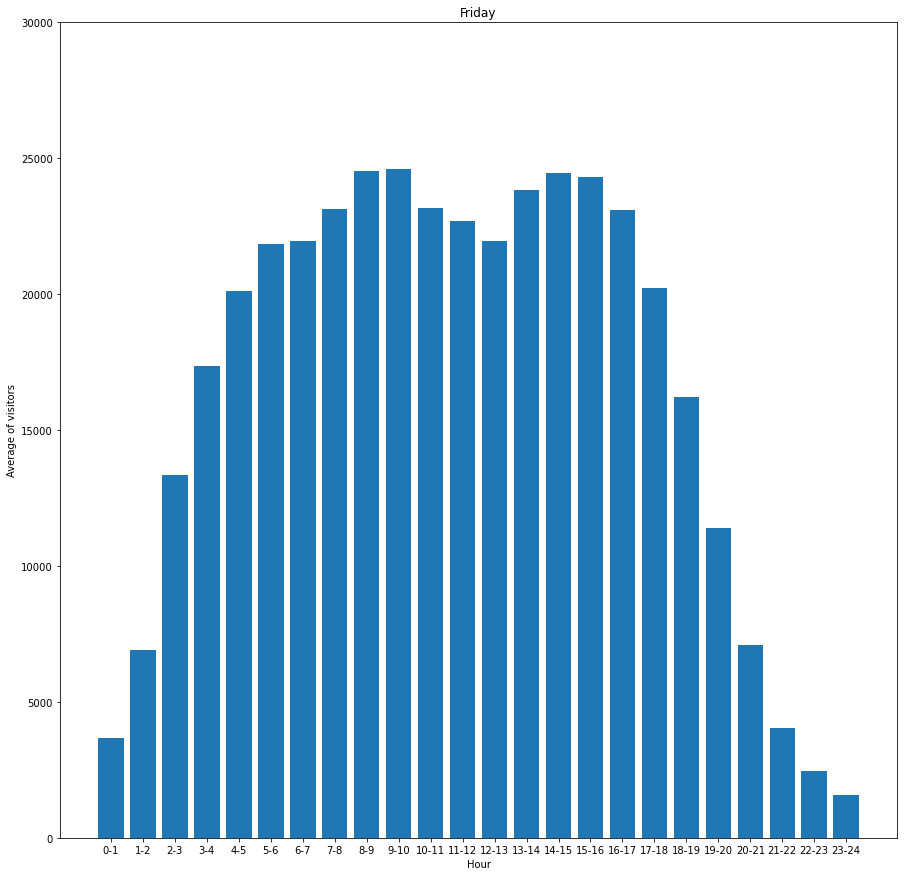

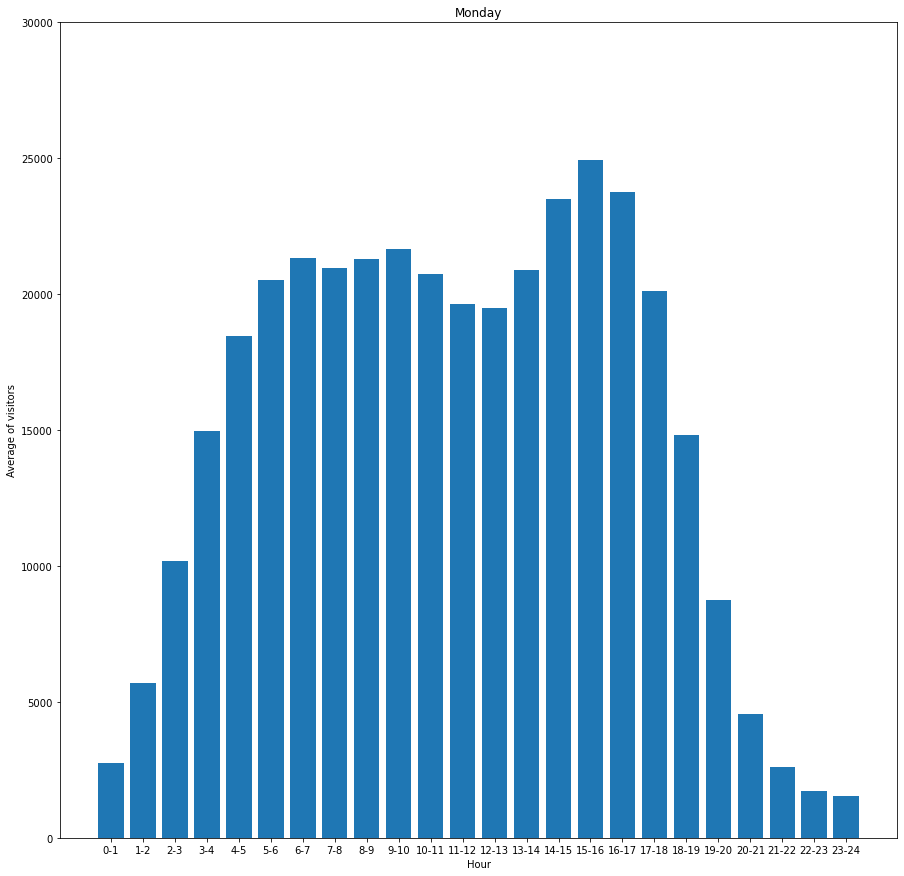

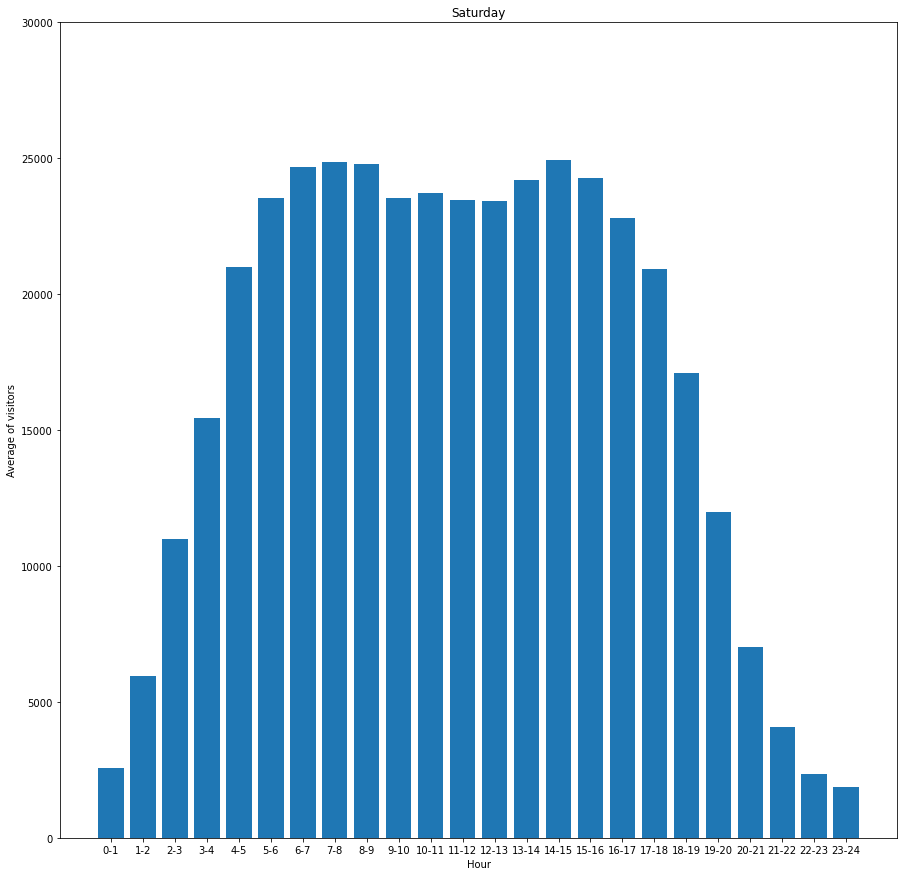

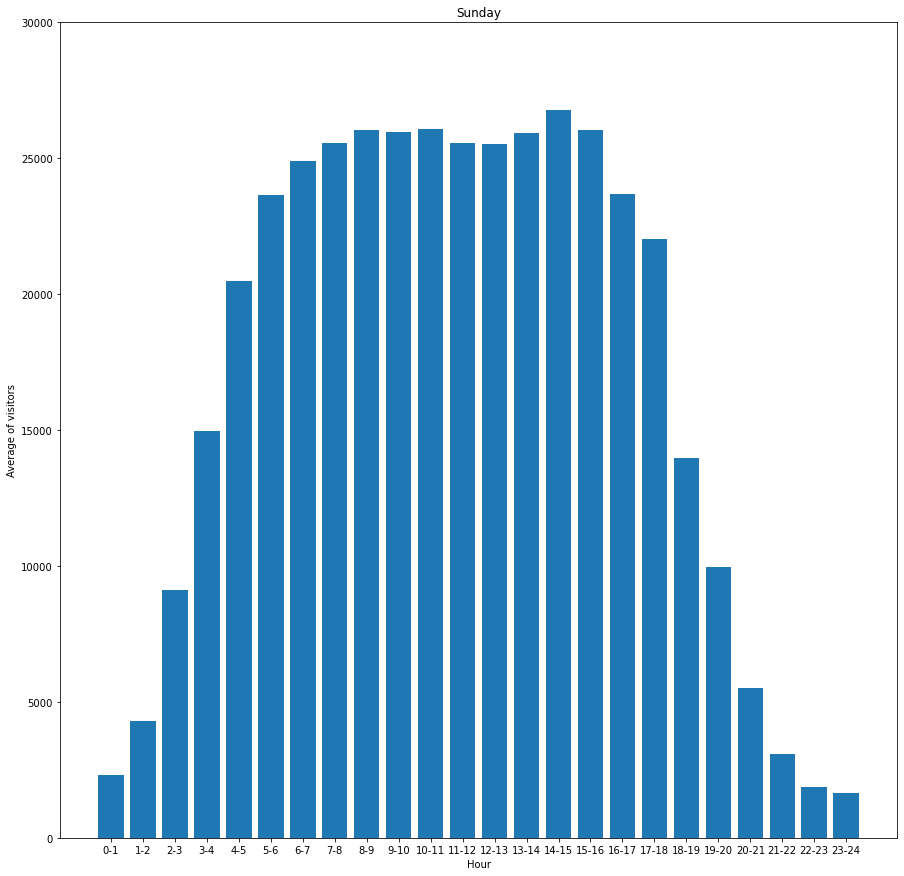

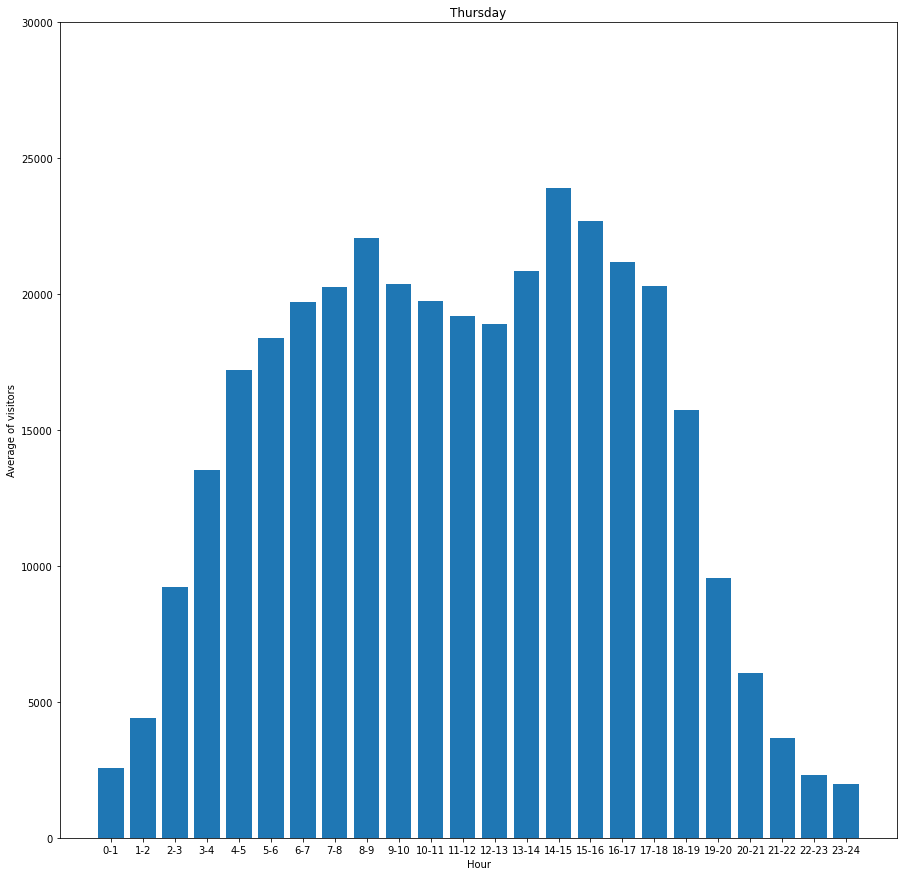

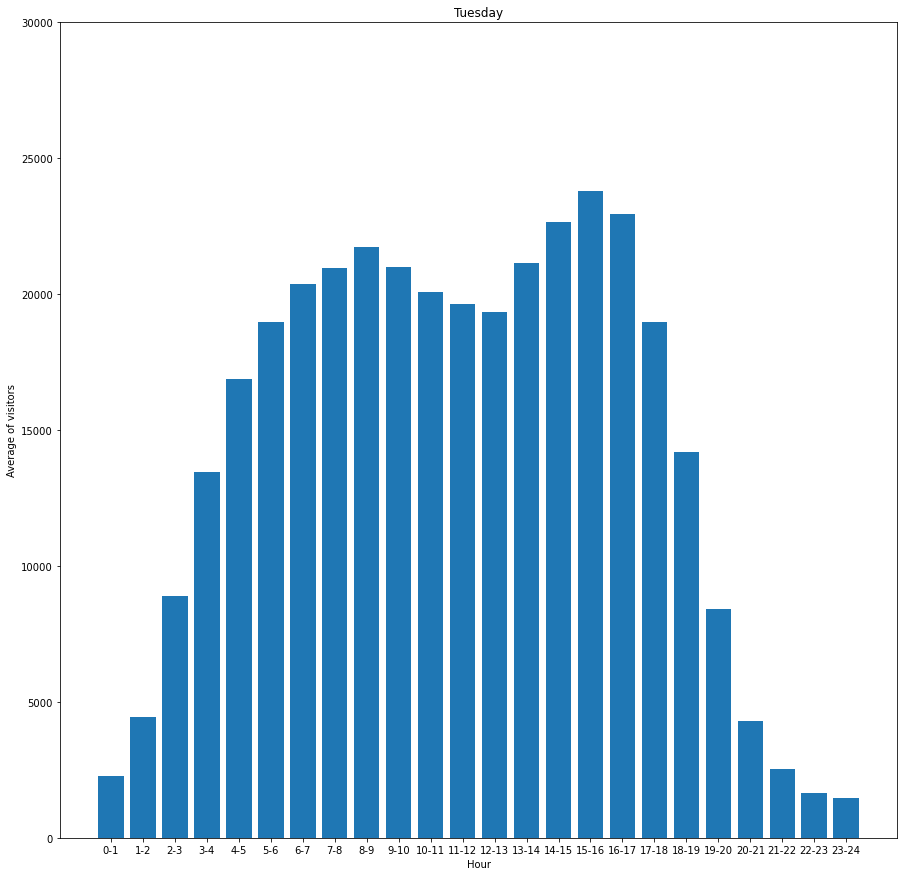

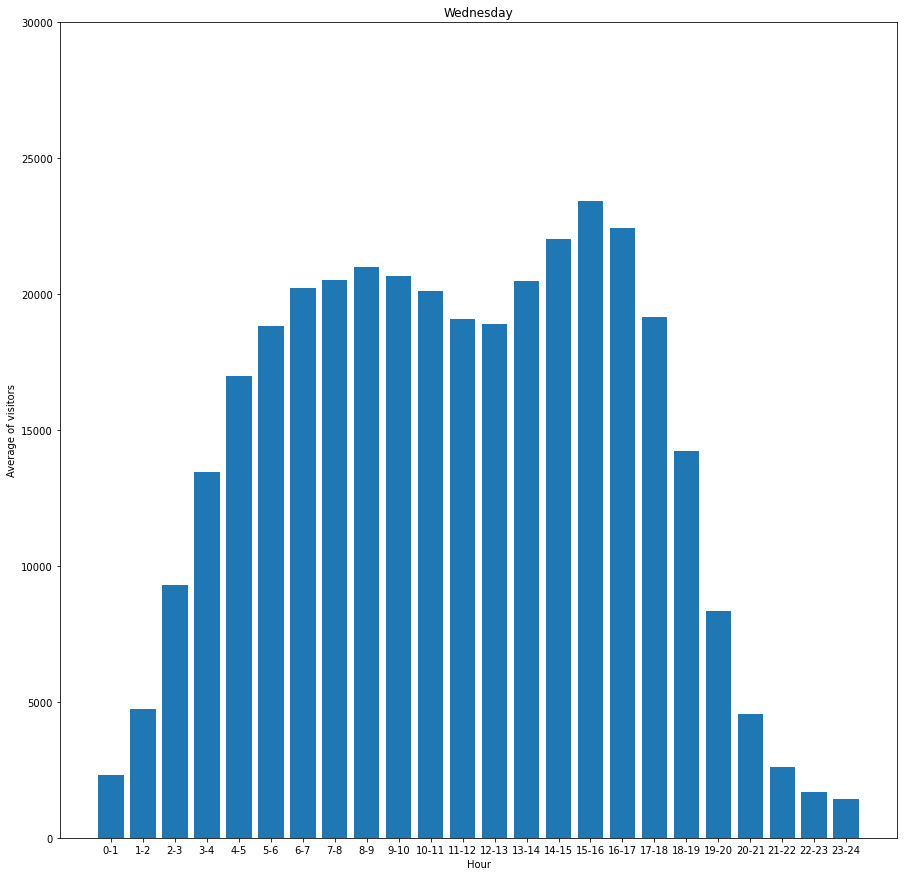

In [7]:
# Per ogni giorno mi stampo un grafico relativo
for day in final_dict:
    plt.figure(7, figsize = (15, 15))
    plt.bar(final_dict[day][0], final_dict[day][1])
    plt.title(day)
    plt.xlabel("Hour")
    plt.ylabel("Average of visitors")
    plt.ylim([0, 30000])
    plt.show()

#### REQUEST 6

The conversion rate of a product is given by the number of times a product has been bought over the number of times it has been visited. What's the conversion rate of your online store?


***6.1 Find the overall conversion rate of your store.***

In [4]:
#with "visited" we consider the times the object has been views, so for all the products all the views are then considered

len(dataset[dataset.event_type == 'purchase'])/len(dataset[dataset.event_type == 'view'])


0.01590817944828352

***6.2 Plot the number of purchases of each category and show the conversion rate of each category in decreasing order.***

In [6]:
purchases = dataset[dataset.event_type == "purchase"]
views = dataset[dataset.event_type == "view"]

In [9]:
purchases = purchases[purchases["category_code"].notnull()]
purchases["category"] = purchases["category_code"].map(from_category_code_to_category)

num_purchases = purchases.groupby(purchases.category).product_id.count()

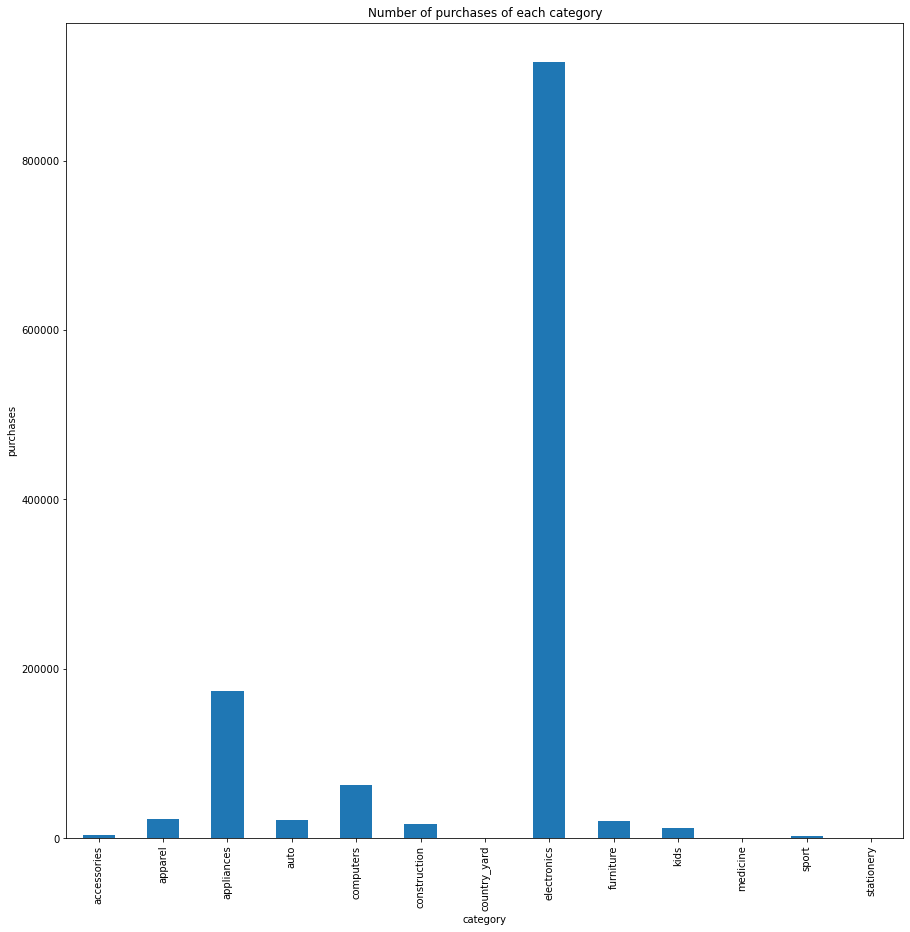

In [30]:
plt.figure(1, figsize = (15, 15))
num_purchases.plot.bar()
plt.title("Number of purchases of each category")
plt.ylabel("purchases")
plt.show()

In [7]:
views = views[views["category_code"].notnull()]
views["category"] = views["category_code"].map(from_category_code_to_category)

num_views = views.groupby(views.category).product_id.count()

In [10]:
(num_purchases/num_views).sort_values(ascending = False).reset_index().rename(columns = {"product_id": "conversion_rate"})

,category,conversion_rate
0,electronics,0.024757
1,medicine,0.018827
2,stationery,0.016819
3,appliances,0.013555
4,computers,0.009897
5,auto,0.009890
6,construction,0.009376
7,kids,0.009015
8,sport,0.006565
9,accessories,0.006068


#### REQUEST 7

The Pareto principle states that for many outcomes roughly 80% of consequences come from 20% of the causes. Also known as 80/20 rule, in e-commerce simply means that most of your business, around 80%, likely comes from about 20% of your customers. 

***Prove that the pareto principle applies to your store.***

In [25]:
# 20% of customers who have purchased an item 
N = int(Sales.user_id.nunique()*20/100)

In [26]:
# 20% of total customer 
Sales.user_id.nunique()*20/100

412979.8

In [27]:
# the biggest 20% of purchaser on total purchaser number

(Sales.groupby('user_id').price.sum().nlargest(N).sum()/\
Sales.groupby('user_id').price.sum().sum())*100

74.55094234253538